In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import json
import os

In [ ]:
root_dir = 'data'
data_files = os.listdir(root_dir)[0], os.listdir(root_dir)[1]

In [ ]:
with open(os.path.join(root_dir, data_files[0])) as f:
    data = json.load(f)

In [ ]:
header = tqa['TBL'][0]
num_cols = len(header)
temp_np_array = np.concatenate([np.array(row) for row in tqa['TBL']]).reshape(-1, num_cols)


In [ ]:
errow_rows = []
possible_tqa = []
print(f"> Processing {len(data['data'])} tables")
for i, tqa in enumerate(data['data']):
    header = tqa['TBL'][0]
    if '' in header:
        errow_rows.append(i)
        continue
    num_cols = len(header)
    error_in_table = False
    for row in tqa['TBL']:
        if len(row) != num_cols:
            errow_rows.append((f'data_idx:{i}', row))
            error_in_table = True
    if not error_in_table:
        cells = np.array(tqa['TBL'])[1:, 2:]
        try:
            cells = cells.astype(np.float)
            possible_tqa.append(tqa)
        except:
            continue
# possible_tqa = [dict(t) for t in set(tuple(sorted(d.items())) for d in possible_tqa)]
print(f"> Found {len(possible_tqa)} tables with numeric values ({len(possible_tqa)/len(data['data'])*100:.1f}%)")

In [ ]:
for tqa in possible_tqa:
    header = tqa['TBL'][0]
    num_cols = len(header)
    print(header)

In [ ]:
colors = ['black', 'dimgray', 'dimgrey', 'gray', 'grey', 'darkgray', 'darkgrey', 'silver', 'lightgray', 'lightgrey', 'gainsboro', 'whitesmoke', 'white', 'snow', 'rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'mistyrose', 'salmon', 'tomato', 'darksalmon', 'coral', 'orangered', 'lightsalmon', 'sienna', 'seashell', 'chocolate', 'saddlebrown', 'sandybrown', 'peachpuff', 'peru', 'linen', 'bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan', 'navajowhite', 'blanchedalmond', 'papayawhip', 'moccasin', 'orange', 'wheat', 'oldlace', 'floralwhite', 'darkgoldenrod', 'goldenrod', 'cornsilk', 'gold', 'lemonchiffon', 'khaki', 'palegoldenrod', 'darkkhaki', 'ivory', 'beige', 'lightyellow', 'lightgoldenrodyellow', 'olive', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'greenyellow', 'chartreuse', 'lawngreen', 'honeydew', 'darkseagreen', 'palegreen', 'lightgreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'springgreen', 'mintcream', 'mediumspringgreen', 'mediumaquamarine', 'aquamarine', 'turquoise', 'lightseagreen', 'mediumturquoise', 'azure', 'lightcyan', 'paleturquoise', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'aqua', 'cyan', 'darkturquoise', 'cadetblue', 'powderblue', 'lightblue', 'deepskyblue', 'skyblue', 'lightskyblue', 'steelblue', 'aliceblue', 'dodgerblue', 'lightslategray', 'lightslategrey', 'slategray', 'slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'ghostwhite', 'lavender', 'midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'thistle', 'plum', 'violet', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink', 'lavenderblush', 'palevioletred', 'crimson', 'pink', 'lightpink']

In [ ]:
tqa

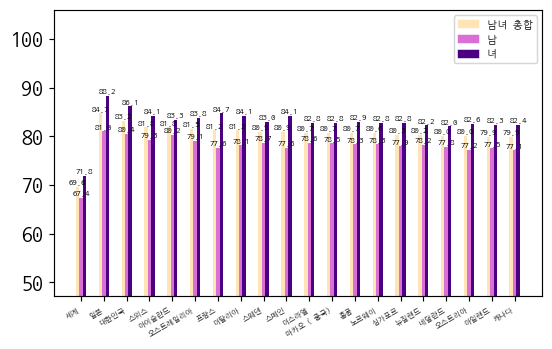

In [96]:
dpi = 105
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['font.size'] = 7.
plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.rcParams['xtick.labelsize'] = 5.
plt.rcParams['ytick.labelsize'] = 15.
plt.rcParams['axes.labelsize'] = 20.


dpi = 600
fig, ax = plt.subplots()
TBL = np.array(tqa['TBL'])

header = TBL[0][2:]
x = TBL[1:, 1]

y_list = []
for y in TBL[1:, 2:].T:
    y_list.append(y.astype(np.float))

selected_colors = np.random.choice(colors, len(y_list), replace=False)
label2color = {label:selected_colors[i] for i, label in enumerate(header)}

handles = [plt.Rectangle((0,0), 0, 0, color=label2color[label]) for i, label in enumerate(header)]
plt.legend(handles, header)

x_axis = np.arange(len(x))*2

num_y = len(y_list)

num_bars_per_tick = len(y_list)
wid = 0.3
diff_w = [wid * (i - (num_bars_per_tick-1)/2) for i in range(num_bars_per_tick)]
bar_list = []
val_list = []

plt.ylim(TBL[1:, 2:].astype(np.float).min() * 0.7, TBL[1:, 2:].astype(np.float).max() * 1.2)

for i, (y, label) in enumerate(zip(y_list, header)):
    x_axis_temp = x_axis + diff_w[i]
    temp_bar = plt.bar(x_axis + diff_w[i], y, wid, color=label2color[label])
    bar_list.append(temp_bar)
    for i, val in enumerate(y):
        temp_val = plt.text(x_axis_temp[i], val, val,
                    fontsize = 6, 
                    horizontalalignment='center',  # horizontalalignment (left, center, right)
                    verticalalignment='bottom')    # verticalalignment (top, center, bottom)
        val_list.append(temp_val)

plt.xticks(x_axis, x)


fig.autofmt_xdate()
fig.savefig('./out.png', format='png', dpi=dpi)

In [91]:
bboxes = []
(x_min, y_min), (x_max, y_max) = ax.bbox.get_points()
## bbox for ticks
xtick_label_idx = 0
for label in ax.get_xticklabels():
    bbox = label.get_window_extent().get_points()
    if bbox[0][0] < x_min or bbox[1][0] > x_max:
        continue
    bboxes.append((f'xtick_{xtick_label_idx}', bbox))
    if i == 0:
        print((f'xtick_{xtick_label_idx}', bbox))
    xtick_label_idx += 1

ytick_label_idx = 0
for label in ax.get_yticklabels():
    bbox = label.get_window_extent().get_points()
    if bbox[0][1] < y_min or bbox[1][1] > y_max:
        continue
    bboxes.append((f'ytick_{ytick_label_idx}', bbox))
    ytick_label_idx += 1
    if i == 0:
        print((f'ytick_{ytick_label_idx}', bbox))

In [92]:
bboxes

[('xtick_0',
  array([[ 87.83553084,  59.61346344],
         [104.3928992 ,  73.79166667]])),
 ('xtick_1',
  array([[110.83364672,  59.61346344],
         [127.39101507,  73.79166667]])),
 ('xtick_2',
  array([[121.27439424,  52.36346344],
         [150.38913095,  73.79166667]])),
 ('xtick_3',
  array([[150.55119429,  55.98846344],
         [173.38724682,  73.79166667]])),
 ('xtick_4',
  array([[160.99194181,  48.73846344],
         [196.38536269,  73.79166667]])),
 ('xtick_5',
  array([[171.43268933,  41.48846344],
         [219.38347857,  73.79166667]])),
 ('xtick_6',
  array([[219.54554191,  55.98846344],
         [242.38159444,  73.79166667]])),
 ('xtick_7',
  array([[236.26497361,  52.36346344],
         [265.37971032,  73.79166667]])),
 ('xtick_8',
  array([[265.54177366,  55.98846344],
         [288.37782619,  73.79166667]])),
 ('xtick_9',
  array([[288.53988953,  55.98846344],
         [311.37594206,  73.79166667]])),
 ('xtick_10',
  array([[305.25932123,  52.36346344],
       

In [81]:
x_min, y_min = p1

In [ ]:
TBL[1:, 2:].astype(np.float).max()

In [ ]:
tqa

In [ ]:
len_x

In [ ]:
dpi=150
fig, ax = plt.subplots()
x = ["es", "yj", "sk", "jw", "mj"]
y_1 = [100,200,300,400,500]
y_2 = [121, 221, 321, 421, 521]


colors = {'fruit':'red', 'vegetable':'green'}     
labels = list(colors.keys())
handles = [plt.Rectangle((0,0), 0, 0, color=colors[label]) for label in labels]
plt.legend(handles, labels)

x_axis = np.arange(len(x))
a = plt.bar(x_axis - 0.2, y_1, 0.4, color=colors['fruit'])
b = plt.bar(x_axis + 0.2, y_2, 0.4, color=colors['vegetable'])

plt.xticks(x_axis, x)
val_list = []
for i, (v_1, v_2) in enumerate(zip(y_1, y_2)):
    b1 = plt.text(x_axis[i]-0.2, y_1[i], y_1[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')
    b2 = plt.text(x_axis[i]+0.2, y_2[i], y_2[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='green',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')
    val_list.append(b1)
    val_list.append(b2)

fig.savefig('./out.png', format='png', dpi=dpi)


In [ ]:
bbox = fig.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width*fig.dpi, bbox.height*fig.dpi
width, height

In [ ]:
ax.get_legend().get_window_extent().get_points()

In [ ]:
ax.get_legend().findobj()[4].get_window_extent().get_points()

In [ ]:
val_list[2].get_window_extent().get_points()

In [ ]:
ax.get_legend().get_window_extent()

In [ ]:
b.get_window_extent().get_points()

In [ ]:
a[0].get_bbox()

In [ ]:
ax.get_xticklabels()[0].get_window_extent()

In [ ]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

In [ ]:
dpi = 100
mpl.rcParams['figure.dpi'] = dpi

fig, ax = plt.subplots()
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

# saving the figure: don't forget the dpi option!
fig.savefig('./out.png', format='png', dpi=dpi)


ymin, _ = ax.get_ylim()
print('xticks pixel coordinates')
print(ax.transData.transform([(xtick, ymin) for xtick in xtickslocs]))
print('label bounding boxes')
print([l.get_window_extent() for l in ax.get_xticklabels()])

In [ ]:
ax.get_xticklabels()[5].get_window_extent(), ax.get_xticklabels()[6].get_window_extent()

In [ ]:
ax.get_xticklabels()[6]

In [ ]:
ax.get_xticklabels()[7].get_window_extent()

In [ ]:
ax.get_xticklabels()[0].get_window_extent()

In [ ]:
ytickslocs[0]

In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )
    print(names)
    return fig
plot_colortable(mcolors.CSS4_COLORS)
plt.show()


In [ ]:
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

In [ ]:
%matplotlib inline
import platform
platform.platform()
import sys
sys.version_info
import matplotlib

print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
import matplotlib.pyplot as plt

plt.plot(range(50), data, 'r')
plt.title('가격변동 추이')
plt.ylabel('가격')
plt.show()
